In [1]:
import numpy as np

In [83]:
#*input parameters

"""
@breif:  input parameters of 2d graphene lattice
@parameter rowNumber: the number of rows of graphene lattice
@parameter columnNumber: the number of maximum columns of graphene lattice
"""

bondLength = 1.0
rowNumber = 9 
columnNumber = 12

###############################################

#* initialize the first row of graphene lattice(n+1 column)

hexagonList = []
rowList = []
grapheneList = []

hexagonList.append([0.0, - bondLength/2.0])
hexagonList.append([np.sqrt(3.0)/2.0 * bondLength, 0.0])
hexagonList.append([np.sqrt(3.0)/2.0 * bondLength, bondLength])
hexagonList.append([0.0, 3.0/2.0 * bondLength])
hexagonList.append([-np.sqrt(3.0)/2.0 * bondLength, bondLength])
hexagonList.append([-np.sqrt(3.0)/2.0 * bondLength, 0.0])

#* initialize rowList
for pnt in hexagonList:
    rowList.append(pnt.copy())



###############################################
#* iteration in one row
oldtmplist = hexagonList[0:4].copy()

for i in range(1, columnNumber):
    tmplist = []

    #* translate the old hexagon to the new hexagon
    for old_pnt in oldtmplist:
        tmppoint = [old_pnt[0] + np.sqrt(3.0) * bondLength, old_pnt[1]]
        rowList.append(tmppoint.copy())
        tmplist.append(tmppoint.copy()) 
    
    # #*debug
    # print(f"{len(rowList)}")
    
    oldtmplist = tmplist.copy()

###############################################

for pnt in rowList:
    grapheneList.append(pnt.copy())


old_nprowList = np.array(rowList)
tVecList = [[np.sqrt(3.0)/2.0 * bondLength, 3.0/2.0 * bondLength], [-np.sqrt(3.0)/2.0 * bondLength, 3.0/2.0 * bondLength]]

for i in range(1, rowNumber):
    tVec = tVecList[(i-1)%2]
    
    nprowList = old_nprowList + tVec
    rowList = nprowList.tolist()
    old_nprowList = np.array(nprowList.copy())

    #* remove the duplicate points
    set_rowList = []
    set_rowList.append(rowList[2].copy())   
    set_rowList.append(rowList[3].copy())
    set_rowList.append(rowList[4].copy())

    for j in range(1, columnNumber):
        set_rowList.append(rowList[4*j + 4].copy())
        set_rowList.append(rowList[4*j + 5].copy())
    
    #* add the boundary points, different in odd and even row
    if (i+1)%2 == 0:
        set_rowList.append(rowList[4*columnNumber -1].copy())
    else:
        set_rowList.append(rowList[5].copy())



    for pnt in set_rowList:
        grapheneList.append(pnt.copy())

    




grapheneList = np.array(grapheneList)

#* it should be 2*(columnNumber+1)*rowNumber + 2*columnNumber
print(f"{grapheneList.shape}")
# grapheneList = np.unique(grapheneList, axis=0)
# print(f"{grapheneList.shape}")


(258, 2)


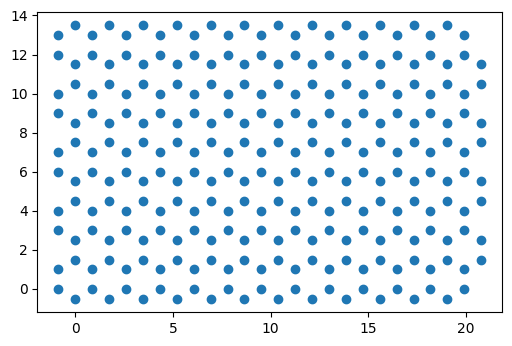

In [84]:
import matplotlib.pyplot as plt

xlist = grapheneList[:, 0].copy()
ylist = grapheneList[:, 1].copy()

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xlist, ylist, 'o')
ax.set_aspect('equal')

plt.show()

In [30]:
rowList.shape

(50, 2)